## Homework 1.3.1 - Pythagorean Problem

Consider three bodies of mass, $m1 = 3$, $m_2 = 4$, and $m_3 = 5$, located coordinate $(x, y)$ at $(1, 3)$, $(-2, -1)$ and $(1, -1)$ respectively. All are initially at rest. The interaction between particles are given by Newton's second law of motion and Newton's gravitational law:

$${{\vec F}_i} = {m_i}{a_i} =  - G\sum\limits_{i \ne j} {{m_i}{m_j}\frac{{{{\vec r}_i} - {{\vec r}_j}}}{{{{\left| {{{\vec r}_i} - {{\vec r}_j}} \right|}^3}}}} $$

Using $G = 4 \pi$, investigate the motion of the particles from $t = 0$ to $t = 10$

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#variables 
m = [3, 4, 5]
y0 = [1, 3, -2, -1, 1, -1, 0, 0, 0, 0, 0, 0]



G = 4. * np.pi**2
N = len(m)

In [3]:
def aj(mj, vec_ri, vec_rj, is_same):
    if is_same:
        return np.zeros(2)
    diff_vec_r  = vec_ri - vec_rj
    norm_vec_r  = (np.linalg.norm(diff_vec_r))**3
    return -G * mj * (diff_vec_r / norm_vec_r)

In [4]:
def rhs(y, t):
    ri = np.reshape(y[:2*N] , (-1, 2))
    vi = y[2*N:]
    ai = []
    for i in range(N):
        xs = 0
        ys = 0
        for j in range(N):
            sol = aj(m[j], ri[i], ri[j], i == j)
            xs += sol[0]
            ys += sol[1]
        ai.append((xs, ys))
    #ai = [ np.sum(aj(m[j], ri[i], ri[j], i == j)) for  i in range(N)  for j in range(N) ]
    return np.concatenate((vi, np.array(ai).flatten()))


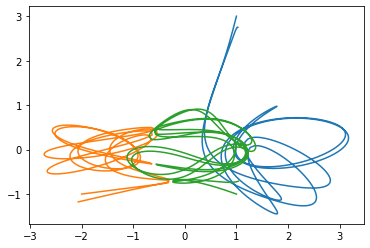

In [5]:
t = np.arange(0, 5.0, 0.002)


sol = odeint(rhs, y0, t)

for i in range(N):
    plt.plot(sol[:, 2 * i], sol[:, 2 * i + 1])
plt.show()

___
## Homework 1.3.2 - Double Pendulum
![alt text](images/double-pendulum.png "Double Pendulum")

The equations of motion for the double pendulum are given by [from http://scienceworld.wolfram.com/physics/DoublePendulum.html]:

$$({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + {m_2}{l_2}{{\ddot \theta }_2}\cos ({\theta _1} - {\theta _2}) + {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) + ({m_1} + {m_2})g\sin {\theta _1} = 0$$

$${m_2}{l_2}{{\ddot \theta }_2} + {m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2}) - {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) + {m_2}g\sin {\theta _2} = 0$$

Given that $l_1 = 1$, $l_2 = 2$, $m_1 = 2$, $m_2 = 1$ and $g = 9.8$ $m/s^2$

The initial conditions at $t = 0$ are:

${{\theta }_1}(0) = 1.5$

${{\dot \theta }_1}(0) = 0$

${{\theta }_2}(0) = 3.0$

${{\dot \theta }_2}(0) = 0.0$

Write a program to plots the positions of the mass $m_2$ in $x-y$ coordinate over the time interval $0 \le t \le T\; s$. Where $T$ are:

a) 10

b) 100

In [2]:
#variables

#initials conditions: 
theta1 = 1.5
theta1_dot = 0.0
theta2 = 3.0
theta2_dot = 0.0

#given 
l1 = 2
l2 = 1
m1 = 2
m2 = 1
g = 9.8


y_init_a = [theta1 , theta1_dot, theta2, theta2_dot]

y_init_b = [theta1 , theta1_dot, theta2, theta2_dot]

t_a = np.arange(0 , 10.0, 0.01)
t_b = np.arange(0, 100.0, 0.01)

In [3]:
def rhs(y , t):
    a = np.array([ [(m1 + m2) * l1 , (m2 * l2) * math.cos(y[0] - y[2])] , 
                [ (m2 * l1) * math.cos(y[0] - y[2]) , (m2 * l2) ]])
    b = np.array([-((m2 * l2 * (y[3]**2) * math.sin(y[0] - y[2])  + ((m1 + m2) * g * (math.sin(y[0]))))),
             ((m2 * l1 * (y[1]**2) * math.sin(y[0] - y[2])) - (m2 * g * math.sin(y[2])))])
    thetas_dbl_dots = np.linalg.solve(a , b)
    return [y[1] , thetas_dbl_dots[0], y[3], thetas_dbl_dots[1]]

y_a = odeint(rhs, y_init_a, t_a)
y_b = odeint(rhs, y_init_b, t_b)

In [4]:
def pol2crat(r, theta):
    z = r *np.exp(1j * (theta - np.pi/2))
    x, y = z.real, z.imag
    return x , y

In [5]:
x_a1, y_a1 = pol2crat(l1, y_a[:, 0])
xr_a2, yr_a2 = pol2crat(l2, y_a[:, 2])
x_a2 = x_a1 + xr_a2
y_a2 = y_a1 + yr_a2

(-4, 4)

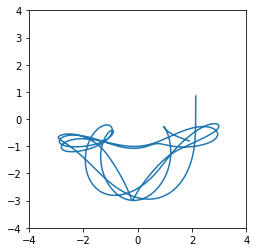

In [6]:
plt.plot(x_a2, y_a2)
s = plt.axis('scaled')
plt.xlim(-4 , 4)
plt.ylim(-4 , 4)

In [7]:
x_b1, y_b1 = pol2crat(l1, y_b[:, 0])
xr_b2, yr_b2 = pol2crat(l2, y_b[:, 2])
x_b2 = x_b1 + xr_b2
y_b2 = y_b1 + yr_b2

(-4, 4)

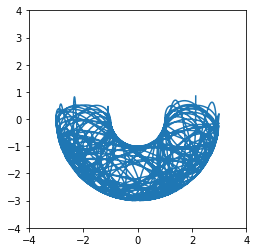

In [8]:
plt.plot(x_b2, y_b2)
s = plt.axis('scaled')
plt.xlim(-4 , 4)
plt.ylim(-4 , 4)